# Exploratory Data Analysis - Titanic

## Explanation of Features

- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin (A-G)
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### Data Exploration
**Name** | **Description**
:-------------------|:---------------:|
Survival       | Survival (0 = No; 1 = Yes)   
Class       | Passenger Class (1= 1st; 2= 2nd; 3 = 3rd)  
Name       | name   
Sex     | Sex   
Age      | Age   
Sibsp      | Number of Siblings/ Spouses Aboard 
Parch      | Number of Parents/Children Aboard   
Ticket      | Ticket Number   
Fare     | Passenger Fare   
Cabin    | Cabin (A-G)   
Embarked    | Port of Embarkation (C= Cherbourg; Q = Queesn   | Horz Dist to nearest wildfire ignition points
Wilderness Area (4 binary columns) | 0 (absence) or 1 (presence) | Wilderness area designation
Soil Type (40 binary columns) | 0 (absence) or 1 (presence) | Soil Type designation
Cover Type | Classes 1 to 7 | Forest Cover Type designation - Response Variable

## Question 1

Read the dataset correctly using pandas, using an appropriate column as index. What is the PassengerId of "Mr. Robert William Norman"?

In [34]:
# Read the dataset and use an appropriate column as index

import pandas as pd
import numpy as np
passengers = pd.read_csv("titanic.csv", index_col = "PassengerId")
passengers.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [183]:
# Give the PassengerId of Mr. Robert William Norman

df = passengers.loc[passengers["Name"] == "Mr. Robert William Norman"]
print(f"The PassengerId of Mr. Robert William Norman is {df.index.values.astype(int)[0]}.")

The PassengerId of Mr. Robert William Norman is 235.


## Question 2

Compute the percentage of survivors out of total number of passengers and the percentage of men and women out of total number of passengers. Paste the answers below.

In [184]:
percentage_survivors = round((len(passengers.loc[passengers["Survived"] == 1])
                                 /len(passengers)*100),2)
print(f"The total percentage of survivors is {percentage_survivors}%.")

male_passengers = round(len(passengers.loc[passengers["Sex"] == "male"])
                                 /len(passengers)*100,2)
print(f"The total percentage of male passengers is {male_passengers}%.")

female_passengers = round(len(passengers.loc[passengers["Sex"] == "female"])
                                 /len(passengers)*100,2)
print(f"The total percentage of female passengers is {female_passengers}%.")

The total percentage of survivors is 38.38%.
The total percentage of male passengers is 64.76%.
The total percentage of female passengers is 35.24%.


## Question 3

Compute the percentage of survivors by sex (i.e. the percentage of male passengers that survived and female passengers that survived) and the sex distribution of survivors (i.e. percentage of survivors that were men and percentage of survivors that were women). Paste the answers below.

## - Part A

In [185]:
percentage_male_survivors = round((len(passengers.loc[(passengers["Survived"] == 1) 
                                                         & (passengers["Sex"] == "male")])
                                                         /passengers[passengers["Sex"] == "male"]["Sex"]
                                                         .count())*100,2)

percentage_female_survivors = round((len(passengers.loc[(passengers["Survived"] == 1) 
                                                         & (passengers["Sex"] == "female")])
                                                         /passengers[passengers["Sex"] == "female"]["Sex"]
                                                         .count())*100,2)

print(f"The percentage of male survivors that survived is {percentage_male_survivors}%")
print(f"and for female survivors is {percentage_female_survivors}%.")

The percentage of male survivors that survived is 18.89%
and for female survivors is 74.2%.


# - Part B 

In [186]:
distribution_male_survivors = round(len(passengers.loc[(passengers["Survived"] == 1) 
                                                         & (passengers["Sex"] == "male")])
                                                         /len(passengers.loc[passengers["Survived"] == 1])
                                                         *100,2)

distribution_female_survivors = round(len(passengers.loc[(passengers["Survived"] == 1) 
                                                         & (passengers["Sex"] == "female")])
                                                         /len(passengers.loc[passengers["Survived"] == 1])
                                                         *100,2)

print(f"The sex distribution of survivors is given by {distribution_male_survivors}% of male survivors")
print(f"and {distribution_female_survivors}% of female survivors.")

The sex distribution of survivors is given by 31.87% of male survivors
and 68.13% of female survivors.


## Question 4

Display in a 2 x 2 DataFrame the probability of being male/female and surviving/not surviving.

Notice that the sum of all values in the table above should be 1 (or 100 %).

In [187]:
# Use pivot table which is the most efficient code
# for values we used "Name" because these should be unique values
# we could also do this with "PassengerId" 

df_1 = round(passengers.pivot_table(values = "Name", 
                                    index = "Sex", 
                                    aggfunc = "count", 
                                    columns = "Survived")
                                    .div(len(passengers))*100,2).astype(str)+'%'

df_1.rename(columns = {0 : "Not Survived", 1 : "Survived"})

Survived,Not Survived,Survived
Sex,,
female,9.09%,26.15%
male,52.53%,12.23%


The following plot describes per Sex the survival rate.


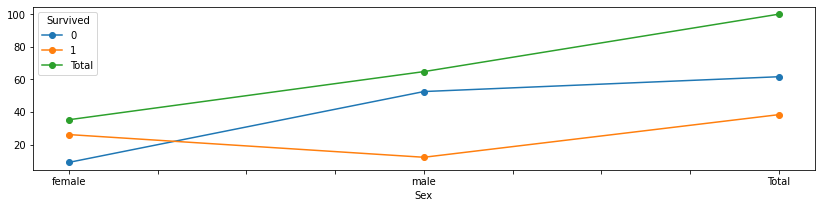

In [35]:
# To make a visualisation and create an extra column for the total percentages

df_2 = round(passengers.pivot_table(values = "Name", 
                                    index = "Sex", 
                                    aggfunc = "count", 
                                    margins = True, 
                                    margins_name = "Total", 
                                    columns = "Survived")
                                    .div(len(passengers))*100,2)

df_2.plot(marker = "o")
print("The following plot describes per Sex the survival rate.")

## Question 5
Display in a DataFrame the probability of survival/not survival of all combinations of sex and class.

Notice that the sum of all values in the table above should be 1 (or 100 %).

In [189]:
# Use pivot table which is the most efficient code

df_3 = round(passengers.pivot_table(values = "Name", 
                                    index = ["Sex","Pclass"], 
                                    aggfunc = "count", 
                                    columns = "Survived")
                                    .div(len(passengers))*100,2).astype(str)+'%'

df_3.rename(columns = {0 : "Not Survived", 1 : "Survived"})

Survived      Not Survived Survived
Sex    Pclass                      
female 1             0.34%   10.21%
       2             0.67%    7.86%
       3             8.08%    8.08%
male   1             8.64%    5.05%
       2            10.21%    1.91%
       3            33.67%    5.27%

The following plot describes per Sex and Pclass the survival rate.


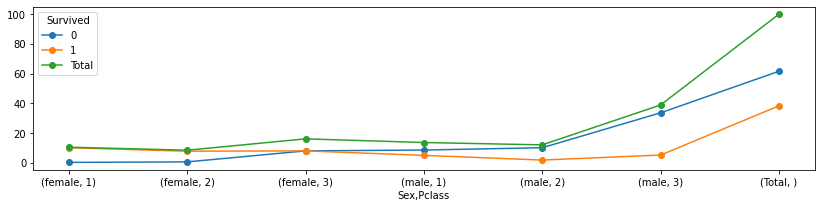

In [36]:
# To make a visualisation and create an extra column for the total percentages

df_4 = round(passengers.pivot_table(values = "Name", 
                                    index = ["Sex","Pclass"], 
                                    aggfunc = "count", 
                                    margins = True,
                                    margins_name = "Total", 
                                    columns = "Survived")
                                    .div(len(passengers))*100,2)

df_4.plot(marker = "o")
print("The following plot describes per Sex and Pclass the survival rate.")

## Question 6

Present 3 insights about the dataset, each of them relating at least 3 different variables, and support them by code and numbers. Possible examples:

- "Men aged less than 18 were more/less likely to survive than the average passenger" (Sex, Age, Survival)
- "Women with no siblings or spouses paid on average a cheaper/pricier ticket than the average woman" (Sex, SibSp, Fare)
"Men with a title other than Mr. were more/less likely to have a known (i.e. non-missing) cabin than the average man" (Sex, Name, Cabin)

(Using these exact examples is valid, but awards fewer points than proposing original insig

## Insight 1
Used variables:
- Cabin
- Sex
- Survived

In [207]:
df_5 = passengers.pivot_table(values = "Name", 
                                    index = [passengers["Cabin"].astype(str).str[0], "Pclass"],
                                    aggfunc = "count",
                                    columns = "Survived")

df_6 = round(df_5.div(df_5.sum(axis=1), axis = 0)*100,2).astype(str) + '%'                                
df_6.rename(columns = {0 : "Not Survived", 1 : "Survived"})

Survived     Not Survived Survived
Cabin Pclass                      
A     1            53.33%   46.67%
B     1            25.53%   74.47%
C     1            40.68%   59.32%
D     1            24.14%   75.86%
      2             25.0%    75.0%
E     1             28.0%    72.0%
      2             25.0%    75.0%
      3              nan%   100.0%
F     2             12.5%    87.5%
      3             80.0%    20.0%
G     3             50.0%    50.0%
T     1            100.0%     nan%
n     1             52.5%    47.5%
      2            55.95%   44.05%
      3            76.41%   23.59%

## Our Insights
- High class cabins: A, B, C and D
- Low class cabins: E, F, and G
- Best survival rate: B, D, E, F(2)
- Worst survival rate: A, F(3), T, n (NaN)

## Insight 2
Used variables:
- Pclass
- Sex
- Name
- Age

For Age we see there are some missing values. 
We can fill these missing values by the mean age based on Pclass, Sex and Title group.

In [109]:
# Gives us more explanation about the different features and will show which ones contain missing values
passengers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [110]:
# Here we can see an example for PassengerId 18 who has a missing value
passengers.head(18)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,Mr. James,male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,Mr. Timothy J,male,54.0,0,0,17463,51.8625,E46,S
8,0,3,Master. Gosta Leonard,male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg),female,27.0,0,2,347742,11.1333,NaN,S


In [111]:
# Filtering passengers with missing Age and Title as Master
passengers[(passengers["Age"].isnull()) & (passengers["Name"].str.contains("Master"))]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
66,1,3,Master. Gerios,male,NaN,1,1,2661,15.2458,NaN,C
160,0,3,Master. Thomas Henry,male,NaN,8,2,CA. 2343,69.5500,NaN,S
177,0,3,Master. Henry Forbes,male,NaN,3,1,4133,25.4667,NaN,S
710,1,3,"Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C


In [113]:
# Calculating the mean age of passengers with title as Master to make it more clear and give a first example
round(passengers[passengers["Name"].str.contains("Master")]["Age"].mean(),2)

4.57

In [114]:
# Extracting Title from the Name column and storing the results in a new column Title
passengers["Title"] = passengers["Name"].str.extract("([A-Za-z]+)\.")

In [115]:
# Creating a new column Age_is_null
passengers["Age_is_null"] = passengers["Age"].isnull()
passengers["Age_is_null"]

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889     True
890    False
891    False
Name: Age_is_null, Length: 891, dtype: bool

In [116]:
#Grouping by Title and Pclass and aggregating by sum to find the missing Age values for Title and Pclass
passengers.groupby(["Title", "Pclass"])["Age_is_null"].agg(["sum"])

sum
Title    Pclass      
Capt     1        0.0
Col      1        0.0
Countess 1        0.0
Don      1        0.0
Dr       1        1.0
         2        0.0
Jonkheer 1        0.0
Lady     1        0.0
Major    1        0.0
Master   1        0.0
         2        0.0
         3        4.0
Miss     1        1.0
         2        2.0
         3       33.0
Mlle     1        0.0
Mme      1        0.0
Mr       1       20.0
         2        9.0
         3       90.0
Mrs      1        8.0
         2        0.0
         3        9.0
Ms       2        0.0
Rev      2        0.0
Sir      1        0.0

In [117]:
# Create a dictionary and categorise the titles into categories
# Only include the people who have missing values
# As an example: we don't include Jonkheer as it has 0 missing values
Title_Dictionary = {"Dr": "Dr", "Mr" : "Mr", "Master" : "Master", "Miss" : "Miss", "Mrs" : "Mrs"}

In [118]:
# Store the dictionary in the Title column of the dataframe
# Map function is used because it's easier to transform all the items rather than using an explicit loop
passengers["Title"] = passengers["Title"].map(Title_Dictionary)

In [119]:
# To visualise the previous steps wes groupby with the new categories created in the dictionary
# and saved in the Title column along with their Pclass
passengers.groupby(["Title", "Pclass"])["Age_is_null"].agg(["sum"])

sum
Title  Pclass      
Dr     1        1.0
       2        0.0
Master 1        0.0
       2        0.0
       3        4.0
Miss   1        1.0
       2        2.0
       3       33.0
Mr     1       20.0
       2        9.0
       3       90.0
Mrs    1        8.0
       2        0.0
       3        9.0

In [120]:
# Next step is to fill the missing Age values based on Pclass, Sex and Title by using the transform function.
# Transform function calculates the mean value for each of the group (Pclass, Sex and Title)
# and returns the value needed to fill the missing value depending on the group
passengers["Age"].fillna(passengers.groupby(["Pclass", "Sex", "Title"])["Age"].transform("mean"), inplace = True)

In [121]:
# We can establish we don't have any missing values anymore
passengers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        871 non-null    object 
 12  Age_is_null  891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(6)
memory usage: 131.4+ KB


In [124]:
# A visualisation of the work we have done where we can see per Title and Pclass
# the transformation we made based on the mean function
passengers.groupby(["Title", "Pclass"])["Age"].agg(["mean"])

mean
Title  Pclass           
Dr     1       43.400000
       2       38.500000
Master 1        5.306667
       2        2.258889
       3        5.350833
Miss   1       30.000000
       2       22.390625
       3       16.123188
Mr     1       41.580460
       2       32.768293
       3       28.724891
Mrs    1       40.882353
       2       33.682927
       3       33.515152

## Our Insights
- There are 177 missing values for Age. 
- The missing values for Age come from the passengers who have one of the following titles:
  Dr, Master, Miss, Mr or Mrs.
- The title Master is associated with children.
- Doctors belonged only to class one and two.

## Insight 3
Used variables:
- Fare
- Sex
- Pclass

The following boxplot shows the distribution of the data based on the variable Fare.


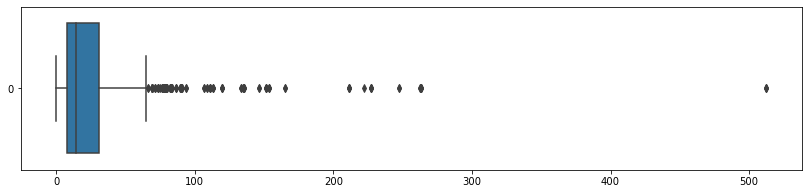

In [37]:
# First we want to detect the outliers for bin creation later on
# and have some more info about the distribution of the variable "Fare"
# Because later on we want to compare the relative frequency and therefore we need the similar bin sizes
# We reload the data without using PassengerId as the index column otherwise the boxplot won't work

passengers = pd.read_csv("titanic.csv")
import seaborn as sns
sns.boxplot(data = passengers["Fare"], orient = "h")
print("The following boxplot shows the distribution of the data based on the variable Fare.")

In [39]:
# We calculate the different quantiles
[Q1,Q2,Q3] = passengers["Fare"].quantile([0.25,0.5,0.75])

In [40]:
# We create the categorical variable using the cut function
category = pd.cut(passengers["Fare"], bins = [passengers["Fare"].min(), Q1,Q2,Q3, 
                                              passengers["Fare"].max()],
                                      labels = ["Very Low", "Low", "High", "Very High"])

passengers.insert(10,"Fare Group", category)
passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Fare Group,Cabin,Embarked
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,Very Low,NaN,S
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,Very High,C85,C
2,3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,Low,NaN,S
3,4,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,Very High,C123,S
4,5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,Low,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev. Juozas,male,27.0,0,0,211536,13.0000,Low,NaN,S
887,888,1,1,Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,High,B42,S
888,889,0,3,"Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,High,NaN,S
889,890,1,1,Mr. Karl Howell,male,26.0,0,0,111369,30.0000,High,C148,C


In [41]:
# Usually we would use the relative percentage to see if the survival rate is different for the different Fare groups
# but we optimised already the bin size so it's not necessary anymore

round(passengers.pivot_table(values = "Name",
                             index = ["Sex","Fare Group"],
                             aggfunc = "count", 
                             columns = "Survived")
                             .div(len(passengers))*100,2).astype(str) + '%'

Survived                0       1
Sex    Fare Group                
female Very Low     1.46%   3.37%
       Low          2.69%   4.83%
       High         3.14%    7.3%
       Very High     1.8%  10.66%
male   Very Low    17.06%   1.46%
       Low         14.81%   2.81%
       High        10.44%   4.04%
       Very High    8.64%   3.82%

The following plot describes per Sex and Fare Group the Survival rate.


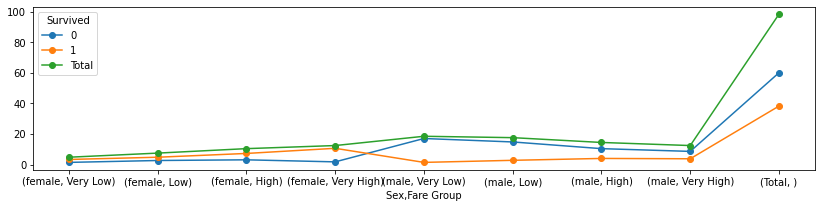

In [42]:
df_3 = round(passengers.pivot_table(values = "Name", 
                                    index = ["Sex","Fare Group"], 
                                    aggfunc = "count", 
                                    margins = True, 
                                    margins_name = "Total",
                                    columns = "Survived")
                                    .div(len(passengers))*100,2)

df_3.plot(marker = "o")
print("The following plot describes per Sex and Fare Group the Survival rate.")

## Our Insights
- The survival rate for women increases according to the amount they paid for a ticket (related to Fare Group).
- The survival rate for men also increases according to the amount they paid for a ticket (related to Fare Group) but at a lower rate.
- The highest rate of unsurvived people can be found where we have male passengers who paid the least for their ticket.